# Sparkify Project Workspace
This workspace contains a tiny subset (128MB) of the full dataset available (12GB). Feel free to use this workspace to build your project, or to explore a smaller subset with Spark before deploying your cluster on the cloud. Instructions for setting up your Spark cluster is included in the last lesson of the Extracurricular Spark Course content.

You can follow the steps below to guide your data analysis and model building portion of this project.

In [1]:
# import libraries
from pyspark.sql import SparkSession
import sys
sys.path.append("../src")
from sparkifychurn import cleanData, exploreData, generateFeatures
from pyspark import SparkConf
import pyspark.sql.functions as F
import pandas as pd
pd.set_option("max.columns", None)
pd.set_option("max.rows", None)
import seaborn as sns
sns.set_theme()

In [2]:
spark = SparkSession\
        .builder\
        .appName("Sparkify")\
        .config("spark.ui.showConsoleProgress", False)\
        .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/07 21:18:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark

# Load and Clean Dataset
In this workspace, the mini-dataset file is `mini_sparkify_event_data.json`. Load and clean the dataset, checking for invalid or missing data - for example, records without userids or sessionids. 

In [4]:
df = spark.read.json("../data/mini_sparkify_event_data.json")

In [5]:
df.limit(5).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Martha Tilston,Logged In,Colin,M,50,Freeman,277.89016,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Rockpools,200,1538352117000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
1,Five Iron Frenzy,Logged In,Micah,M,79,Long,236.09424,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Canada,200,1538352180000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
2,Adam Lambert,Logged In,Colin,M,51,Freeman,282.82730,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Time For Miracles,200,1538352394000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
3,Enigma,Logged In,Micah,M,80,Long,262.71302,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Knocking On Forbidden Doors,200,1538352416000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
4,Daft Punk,Logged In,Colin,M,52,Freeman,223.60771,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Harder Better Faster Stronger,200,1538352676000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30


In [6]:
df.dtypes

[('artist', 'string'),
 ('auth', 'string'),
 ('firstName', 'string'),
 ('gender', 'string'),
 ('itemInSession', 'bigint'),
 ('lastName', 'string'),
 ('length', 'double'),
 ('level', 'string'),
 ('location', 'string'),
 ('method', 'string'),
 ('page', 'string'),
 ('registration', 'bigint'),
 ('sessionId', 'bigint'),
 ('song', 'string'),
 ('status', 'bigint'),
 ('ts', 'bigint'),
 ('userAgent', 'string'),
 ('userId', 'string')]

In [7]:
(df.count(),len(df.columns))

(286500, 18)

In [8]:
missing_summary = exploreData.summarize_missing_vals(df)

****Feature artist complete.****
****Feature auth complete.****
****Feature firstName complete.****
****Feature gender complete.****
****Feature itemInSession complete.****
****Feature lastName complete.****
****Feature length complete.****
****Feature level complete.****
****Feature location complete.****
****Feature method complete.****
****Feature page complete.****
****Feature registration complete.****
****Feature sessionId complete.****
****Feature song complete.****
****Feature status complete.****
****Feature ts complete.****
****Feature userAgent complete.****
****Feature userId complete.****


In [9]:
missing_summary

,feature,missing_count,missing_percentage,empty_string_count,empty_percentage
0,artist,58392,20.38,0,0.00
1,auth,0,0.00,0,0.00
2,firstName,8346,2.91,0,0.00
3,gender,8346,2.91,0,0.00
4,itemInSession,0,0.00,0,0.00
5,lastName,8346,2.91,0,0.00
6,length,58392,20.38,0,0.00
7,level,0,0.00,0,0.00
8,location,8346,2.91,0,0.00
9,method,0,0.00,0,0.00


In [10]:
df.groupby("auth").count().show()

+----------+------+
|      auth| count|
+----------+------+
|Logged Out|  8249|
| Cancelled|    52|
| Logged In|278102|
|     Guest|    97|
+----------+------+



In [11]:
df.filter(F.col("auth")=="Guest").limit(5).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,None,Guest,None,None,0,None,NaN,free,None,GET,Error,NaN,151,None,404,1540841775000,None,
1,None,Guest,None,None,1,None,NaN,free,None,GET,Home,NaN,151,None,200,1540841817000,None,
2,None,Guest,None,None,2,None,NaN,free,None,GET,Register,NaN,151,None,200,1540841826000,None,
3,None,Guest,None,None,3,None,NaN,free,None,GET,Help,NaN,151,None,200,1540841834000,None,
4,None,Guest,None,None,4,None,NaN,free,None,GET,Home,NaN,151,None,200,1540841838000,None,


In [12]:
clean_df = cleanData.clean_logs(df)

In [13]:
clean_df.dtypes

[('artist', 'string'),
 ('auth', 'string'),
 ('firstName', 'string'),
 ('gender', 'string'),
 ('itemInSession', 'bigint'),
 ('lastName', 'string'),
 ('length', 'double'),
 ('level', 'string'),
 ('location', 'string'),
 ('method', 'string'),
 ('page', 'string'),
 ('registration', 'bigint'),
 ('sessionId', 'bigint'),
 ('song', 'string'),
 ('status', 'bigint'),
 ('ts', 'bigint'),
 ('userAgent', 'string'),
 ('userId', 'string')]

In [15]:
exploreData.summarize_missing_vals(clean_df)

****Feature artist complete.****
****Feature auth complete.****
****Feature firstName complete.****
****Feature gender complete.****
****Feature itemInSession complete.****
****Feature lastName complete.****
****Feature length complete.****
****Feature level complete.****
****Feature location complete.****
****Feature method complete.****
****Feature page complete.****
****Feature registration complete.****
****Feature sessionId complete.****
****Feature song complete.****
****Feature status complete.****
****Feature ts complete.****
****Feature userAgent complete.****
****Feature userId complete.****


,feature,missing_count,missing_percentage,empty_string_count,empty_percentage
0,artist,50046,17.99,0,0.0
1,auth,0,0.00,0,0.0
2,firstName,0,0.00,0,0.0
3,gender,0,0.00,0,0.0
4,itemInSession,0,0.00,0,0.0
5,lastName,0,0.00,0,0.0
6,length,50046,17.99,0,0.0
7,level,0,0.00,0,0.0
8,location,0,0.00,0,0.0
9,method,0,0.00,0,0.0


The the remaining null values are a result of interactions in the logs that are non-song related. 

# Initial Exploratory Data Analysis

In [48]:
clean_df.groupby("auth").count().show()

+---------+------+
|     auth| count|
+---------+------+
|Cancelled|    52|
|Logged In|278102|
+---------+------+



In [37]:
clean_df.groupby("gender").count().show()

+------+------+
|gender| count|
+------+------+
|     F|154578|
|     M|123576|
+------+------+



In [38]:
clean_df.groupby("level").count().show()

+-----+------+
|level| count|
+-----+------+
| free| 55721|
| paid|222433|
+-----+------+



In [41]:
clean_df.select("location").drop_duplicates().show()

+--------------------+
|            location|
+--------------------+
|     Gainesville, FL|
|Atlantic City-Ham...|
|Deltona-Daytona B...|
|San Diego-Carlsba...|
|Kingsport-Bristol...|
|New Haven-Milford...|
|  Corpus Christi, TX|
|         Dubuque, IA|
|Las Vegas-Henders...|
|Indianapolis-Carm...|
|Seattle-Tacoma-Be...|
|   Winston-Salem, NC|
|     Bakersfield, CA|
|Los Angeles-Long ...|
|Minneapolis-St. P...|
|San Francisco-Oak...|
|Phoenix-Mesa-Scot...|
|Allentown-Bethleh...|
|Miami-Fort Lauder...|
|           Selma, AL|
+--------------------+
only showing top 20 rows



Check out a single user's usage patterns and resulting subscription cancellation:

In [23]:
clean_df.filter(F.col("userId")==18).sort("ts", ascending = True).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,None,Logged In,Adriel,M,0,Mendoza,NaN,paid,"Kansas City, MO-KS",GET,Home,1535623466000,242,None,200,2018-10-02 11:05:17,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",18
1,Mike And The Mechanics,Logged In,Adriel,M,1,Mendoza,275.12118,paid,"Kansas City, MO-KS",PUT,NextSong,1535623466000,242,A Beggar On A Beach Of Gold,200,2018-10-02 11:05:33,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",18
2,Taking Back Sunday,Logged In,Adriel,M,2,Mendoza,268.32934,paid,"Kansas City, MO-KS",PUT,NextSong,1535623466000,242,...slowdance On The Inside (Album Version),200,2018-10-02 11:10:08,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",18
3,Beirut,Logged In,Adriel,M,3,Mendoza,178.72934,paid,"Kansas City, MO-KS",PUT,NextSong,1535623466000,242,St. Apollonia,200,2018-10-02 11:14:36,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",18
4,Bob Log III,Logged In,Adriel,M,4,Mendoza,188.76036,paid,"Kansas City, MO-KS",PUT,NextSong,1535623466000,242,Drunk Stripper,200,2018-10-02 11:17:34,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",18
5,Krisiun,Logged In,Adriel,M,5,Mendoza,167.91465,paid,"Kansas City, MO-KS",PUT,NextSong,1535623466000,242,In League With Satan,200,2018-10-02 11:20:42,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",18
6,None,Logged In,Adriel,M,6,Mendoza,NaN,paid,"Kansas City, MO-KS",GET,Settings,1535623466000,242,None,200,2018-10-02 11:20:56,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",18
7,HYPOCRISY,Logged In,Adriel,M,7,Mendoza,331.38893,paid,"Kansas City, MO-KS",PUT,NextSong,1535623466000,242,The Quest,200,2018-10-02 11:23:29,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",18
8,Bullet For My Valentine,Logged In,Adriel,M,8,Mendoza,247.69261,paid,"Kansas City, MO-KS",PUT,NextSong,1535623466000,242,Waking The Demon,200,2018-10-02 11:29:00,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",18
9,She & Him,Logged In,Adriel,M,9,Mendoza,153.52118,paid,"Kansas City, MO-KS",PUT,NextSong,1535623466000,242,Why Do You Let Me Stay Here?,200,2018-10-02 11:33:07,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",18


In [182]:
user_count = df.select("userId").drop_duplicates().count()
print("Number of unique users: {}".format(user_count))

Number of unique users: 226


Let's take a look at another customer and sort their interactions from first to last:

In [184]:
clean_df.filter(F.col("userId")==30).sort("ts", ascending = True).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,method_status
0,Martha Tilston,Logged In,Colin,M,50,Freeman,277.89016,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Rockpools,200,1538352117,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,PUT_200
1,Adam Lambert,Logged In,Colin,M,51,Freeman,282.82730,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Time For Miracles,200,1538352394,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,PUT_200
2,Daft Punk,Logged In,Colin,M,52,Freeman,223.60771,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Harder Better Faster Stronger,200,1538352676,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,PUT_200
3,Starflyer 59,Logged In,Colin,M,53,Freeman,185.44281,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Passengers (Old Album Version),200,1538352899,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,PUT_200
4,None,Logged In,Colin,M,54,Freeman,NaN,paid,"Bakersfield, CA",PUT,Add to Playlist,1538173362000,29,None,200,1538352905,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,PUT_200
5,Frumpies,Logged In,Colin,M,55,Freeman,134.47791,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Fuck Kitty,200,1538353084,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,PUT_200
6,Edward Sharpe & The Magnetic Zeros,Logged In,Colin,M,56,Freeman,223.58159,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Jade,200,1538353218,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,PUT_200
7,Stan Mosley,Logged In,Colin,M,57,Freeman,246.69995,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,So-Called Friends,200,1538353441,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,PUT_200
8,Orishas,Logged In,Colin,M,58,Freeman,222.22322,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Represent,200,1538353687,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,PUT_200
9,Downhere,Logged In,Colin,M,59,Freeman,223.92118,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Here I Am,200,1538353909,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,PUT_200


In [199]:
page_summary = clean_df.groupby("page").count().sort("count", ascending = False).toPandas()

In [201]:
page_summary

,page,count
0,NextSong,228108
1,Thumbs Up,12551
2,Home,10082
3,Add to Playlist,6526
4,Add Friend,4277
5,Roll Advert,3933
6,Logout,3226
7,Thumbs Down,2546
8,Downgrade,2055
9,Settings,1514


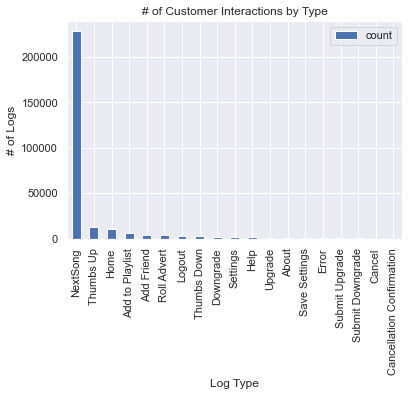

In [210]:
from matplotlib import pyplot as plt
page_summary.plot.bar(x="page", y = "count")
plt.xlabel("Log Type")
plt.ylabel("# of Logs")
plt.title("# of Customer Interactions by Type");

In [139]:
clean_df.groupby("method", "status").count().show()

+------+------+------+
|method|status| count|
+------+------+------+
|   PUT|   200|234634|
|   GET|   200| 20084|
|   PUT|   307| 23184|
|   GET|   404|   252|
+------+------+------+



In [143]:
clean_df.filter(F.col("status")=="307").limit(5).toPandas()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,None,Logged In,Micah,M,86,Long,NaN,free,"Boston-Cambridge-Newton, MA-NH",PUT,Thumbs Up,1538331630000,8,None,307,1538353376,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
1,None,Logged In,Alexi,F,7,Warren,NaN,paid,"Spokane-Spokane Valley, WA",PUT,Thumbs Up,1532482662000,53,None,307,1538355255,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:32.0) G...,54
2,None,Logged In,Micah,M,95,Long,NaN,free,"Boston-Cambridge-Newton, MA-NH",PUT,Thumbs Down,1538331630000,8,None,307,1538355306,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
3,None,Logged In,Micah,M,99,Long,NaN,free,"Boston-Cambridge-Newton, MA-NH",PUT,Logout,1538331630000,8,None,307,1538355687,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
4,None,Logged In,Ashlynn,F,9,Williams,NaN,free,"Tallahassee, FL",PUT,Thumbs Up,1537365219000,217,None,307,1538355711,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",74


In [54]:
clean_df.groupby("status", "method", "page").count().show()

+------+------+--------------------+------+
|status|method|                page| count|
+------+------+--------------------+------+
|   404|   GET|               Error|   252|
|   200|   GET|               About|   495|
|   307|   PUT|    Submit Downgrade|    63|
|   200|   GET|             Upgrade|   499|
|   200|   GET|           Downgrade|  2055|
|   200|   GET|Cancellation Conf...|    52|
|   200|   PUT|            NextSong|228108|
|   307|   PUT|              Cancel|    52|
|   307|   PUT|          Add Friend|  4277|
|   307|   PUT|              Logout|  3226|
|   200|   GET|                Home| 10082|
|   200|   GET|         Roll Advert|  3933|
|   200|   GET|            Settings|  1514|
|   200|   GET|                Help|  1454|
|   200|   PUT|     Add to Playlist|  6526|
|   307|   PUT|           Thumbs Up| 12551|
|   307|   PUT|       Save Settings|   310|
|   307|   PUT|         Thumbs Down|  2546|
|   307|   PUT|      Submit Upgrade|   159|
+------+------+-----------------

My general approach is to summarize individual user behavior such that it is a single observation in the final data set and use their behavior to identify characteristics of service cancellation (for both free and paid tiers). One of the main features in the log data is the "page" feature. This describes various interactions the user is having during their engagement with the service. We'll look at the various interaction types, how often they occur, and their "rate" of occurence relative to their total engagement time with the platform.

In [16]:
user_summary = generateFeatures.generate_features(clean_df)

In [17]:
user_summary.limit(5).toPandas()

21/12/07 21:20:19 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,userId,gender,count_items,sum_length,paid,session_count,submit_downgrade_count,thumbs_down_count,home_count,downgrade_count,advert_count,save_settings_count,churn,about_count,settings_count,add_playlist_count,add_friend_count,next_song_count,thumbs_up_count,help_count,upgrade_count,error_count,submit_upgrade,non_song_interaction_count,PUT_200_count,GET_200_count,PUT_307_count,tenure_days,thumbs_up_pct,avg_items_session,avg_songs_session,sum_session_length_hours,avg_session_length_hours,interaction_rate,submit_downgrade_rate,thumbs_down_rate,home_rate,downgrade_rate,advert_rate,save_settings_rate,about_rate,settings_rate,add_playlist_rate,add_friend_rate,next_song_rate,thumbs_up_rate,help_rate,upgrade_rate,error_rate,non_song_interaction_rate
0,10,M,795,166866.37251,1,6,0,4,30,7,1,1,0,2,7,9,12,673,37,1,0,0,0,122,682,48,65,42.437130,0.902439,132.500000,112.166667,45.974722,7.662454,17.292111,0.000000,0.087004,0.652532,0.152258,0.021751,0.021751,0.043502,0.152258,0.195760,0.261013,14.638479,0.804790,0.021751,0.000000,0.000000,2.653632
1,100,M,3214,672877.85659,1,35,1,27,105,30,25,5,0,12,11,61,49,2682,148,18,1,3,1,532,2743,202,266,58.966285,0.845714,91.828571,76.628571,184.636111,5.275317,17.407212,0.005416,0.146234,0.568686,0.162482,0.135401,0.027080,0.064993,0.059577,0.330380,0.265387,14.525869,0.801577,0.097489,0.005416,0.016248,2.881343
2,100001,F,187,35073.74215,0,4,0,2,11,0,14,0,1,0,1,3,2,133,8,1,2,1,0,53,136,30,20,1.408576,0.800000,46.750000,33.250000,9.877222,2.469306,18.932448,0.000000,0.202486,1.113673,0.000000,1.417403,0.000000,0.000000,0.101243,0.303729,0.202486,13.465324,0.809944,0.101243,0.202486,0.101243,5.365881
3,100002,F,218,49559.91810,1,4,0,0,6,2,3,0,0,0,0,5,1,195,5,0,0,0,0,23,200,11,7,55.092951,1.000000,54.500000,48.750000,13.412222,3.353056,16.253831,0.000000,0.000000,0.447353,0.149118,0.223677,0.000000,0.000000,0.000000,0.372794,0.074559,14.538978,0.372794,0.000000,0.000000,0.000000,1.714854
4,100003,F,78,12306.41932,0,2,0,0,7,0,9,0,1,0,0,2,0,51,3,1,0,0,0,26,53,18,7,2.018067,1.000000,39.000000,25.500000,3.303889,1.651944,23.608542,0.000000,0.000000,2.118715,0.000000,2.724063,0.000000,0.000000,0.000000,0.605347,0.000000,15.436354,0.908021,0.302674,0.000000,0.000000,7.869514


# Exploratory Data Analysis
When you're working with the full dataset, perform EDA by loading a small subset of the data and doing basic manipulations within Spark. In this workspace, you are already provided a small subset of data you can explore.

### Define Churn

Once you've done some preliminary analysis, create a column `Churn` to use as the label for your model. I suggest using the `Cancellation Confirmation` events to define your churn, which happen for both paid and free users. As a bonus task, you can also look into the `Downgrade` events.

### Explore Data
Once you've defined churn, perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned. You can start by exploring aggregates on these two groups of users, observing how much of a specific action they experienced per a certain time unit or number of songs played.

In [242]:
user_summary.groupby("churn").agg(F.mean("sum_length"), 
                                  F.mean("count_items"),
                                  F.mean("thumbs_down_count"), 
                                  F.mean("thumbs_down_rate"), 
                                  F.mean("interaction_rate"), 
                                  F.mean("avg_session_length_hours"),
                                  F.mean("thumbs_up_pct"),
                                  F.mean("tenure_days"),
                                  F.mean("error_rate"), 
                                  F.mean("advert_rate"),
                                  F.mean("submit_downgrade_rate"), 
                                  F.mean("count_items"), 
                                  F.mean("avg_items_session"), 
                                  F.mean("settings_rate"), 
                                  F.mean("non_song_interaction_rate")).toPandas()

,churn,avg(sum_length),avg(count_items),avg(thumbs_down_count),avg(thumbs_down_rate),avg(interaction_rate),avg(avg_session_length_hours),avg(thumbs_up_pct),avg(tenure_days),avg(error_rate),avg(advert_rate),avg(submit_downgrade_rate),avg(count_items),avg(avg_items_session),avg(settings_rate),avg(non_song_interaction_rate)
0,1,174014.268551,862.769231,9.538462,0.257891,19.197636,4.326242,0.738292,23.514648,0.013791,0.874167,0.003334,862.769231,77.617051,0.195609,4.651722
1,0,276166.937468,1348.497110,11.849711,0.148036,18.161430,4.946176,0.829565,46.990873,0.018385,0.538325,0.003719,1348.497110,86.995174,0.148272,3.671901


In [225]:
user_summary.count()

225

In [228]:
user_summary_pd = user_summary.toPandas()

In [229]:
user_summary_pd.dtypes

userId                         object
gender                         object
count_items                     int64
sum_length                    float64
paid                            int32
session_count                   int64
submit_downgrade_count          int64
thumbs_down_count               int64
home_count                      int64
downgrade_count                 int64
advert_count                    int64
save_settings_count             int64
churn                           int32
about_count                     int64
settings_count                  int64
add_playlist_count              int64
add_friend_count                int64
next_song_count                 int64
thumbs_up_count                 int64
help_count                      int64
upgrade_count                   int64
error_count                     int64
submit_upgrade                  int32
non_song_interaction_count      int64
PUT_200_count                   int64
GET_200_count                   int64
PUT_307_coun

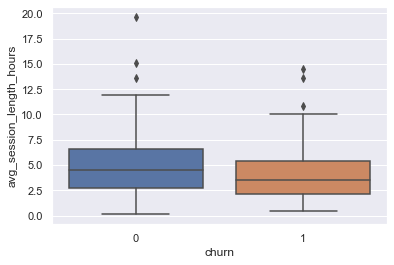

In [230]:
sns.boxplot(x = "churn", y = "avg_session_length_hours", data = user_summary_pd);

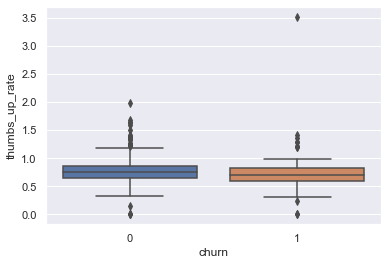

In [232]:
sns.boxplot(x = "churn", y = "thumbs_up_rate", data = user_summary_pd);

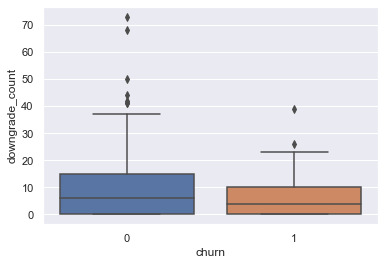

In [234]:
sns.boxplot(x = "churn", y = "downgrade_count", data = user_summary_pd);

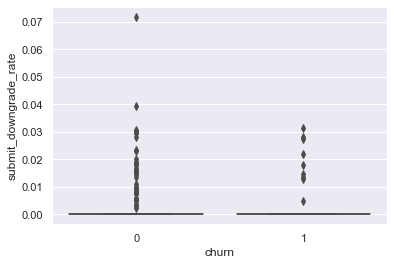

In [236]:
sns.boxplot(x = "churn", y = "submit_downgrade_rate", data = user_summary_pd);

In [244]:
user_summary_pd.groupby('churn').agg(['mean','std'])

userId                 count_items                  sum_length  \
                mean            std         mean          std           mean   
churn                                                                          
0                inf  110276.043767  1348.497110  1425.428637  276166.937468   
1      1.923098e+225   86381.677066   862.769231   852.262378  174014.268551   

                          paid           session_count             \
                 std      mean       std          mean        std   
churn                                                               
0      294900.238162  0.745665  0.436751     15.254335  15.866963   
1      177867.161274  0.692308  0.466041     10.326923   8.610803   

      submit_downgrade_count           thumbs_down_count             \
                        mean       std              mean        std   
churn                                                                 
0                   0.312139  0.634037         11.849711  14.035274   
1                   0.173077  0.382005          9.538462   9.088803   

      home_count            downgrade_count            advert_count  \
            mean        std            mean        std         mean   
churn                                                                 
0      48.612717  50.936181        9.930636  12.513520    17.144509   
1      32.153846  29.368106        6.480769   8.206861    18.596154   

                 save_settings_count           about_count            \
             std                mean       std        mean       std   
churn                                                                  
0      21.527077            1.456647  1.856674    2.537572  3.426136   
1      21.799676            1.115385  1.231193    1.076923  1.218262   

      settings_count           add_playlist_count            add_friend_count  \
                mean       std               mean        std             mean   
churn                                                                           
0           7.190751  7.481258          31.722543  35.056821        21.046243   
1           5.192308  4.723900          19.961538  21.166901        12.230769   

                 next_song_count              thumbs_up_count             \
             std            mean          std            mean        std   
churn                                                                      
0      22.286667     1108.173410  1183.146703       61.803468  70.416424   
1      11.157720      699.884615   714.737650       35.750000  39.697817   

      help_count           upgrade_count           error_count            \
            mean       std          mean       std        mean       std   
churn                                                                      
0       7.023121  7.664441      2.236994  2.655932    1.271676  1.585236   
1       4.596154  5.259015      2.153846  2.226266    0.615385  0.843751   

      submit_upgrade           non_song_interaction_count             \
                mean       std                       mean        std   
churn                                                                  
0           0.589595  0.493335                 240.323699  244.60376   
1           0.557692  0.501506                 162.884615  140.93896   

      PUT_200_count              GET_200_count            PUT_307_count  \
               mean          std          mean        std          mean   
churn                                                                     
0       1139.895954  1217.777632     94.676301  92.937647    112.653179   
1        719.846154   735.355040     71.250000  57.839153     71.057692   

                  tenure_days            thumbs_up_pct            \
              std        mean        std          mean       std   
churn                                                              
0      120.209633   46.990873  16.129928      0.829565  0.144283   
1       66.351829

<AxesSubplot:xlabel='churn', ylabel='advert_rate'>

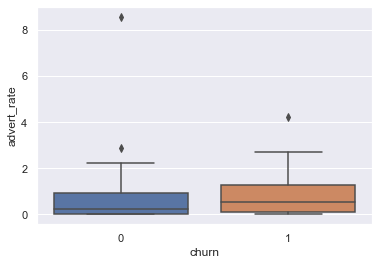

In [248]:
sns.boxplot(y = "advert_rate", x = "churn", data = user_summary_pd)

In [251]:
pd.crosstab(user_summary_pd["churn"], user_summary_pd["paid"], normalize = "columns")

paid,0,1
churn,,
0,0.733333,0.781818
1,0.266667,0.218182


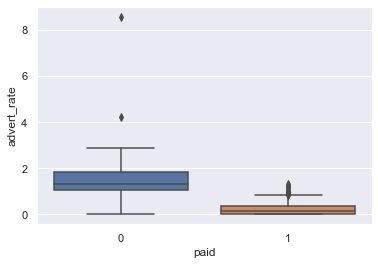

In [253]:
sns.boxplot(x = "paid", y = "advert_rate", data = user_summary_pd);

In [254]:
correlations=user_summary_pd.corr()

<AxesSubplot:>

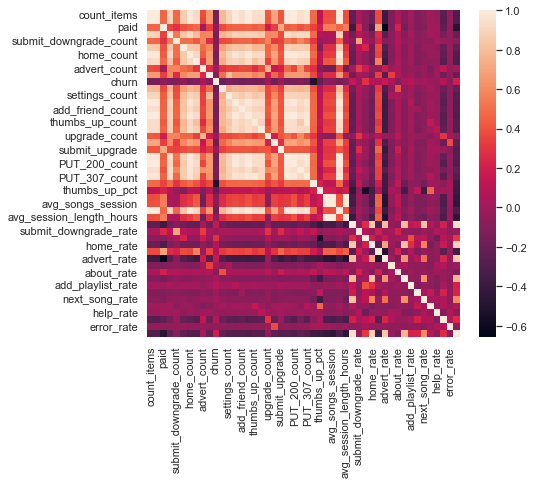

In [255]:
# Make the figsize 7 x 6
plt.figure(figsize=(7,6))
# Plot heatmap of correlations
sns.heatmap(correlations)

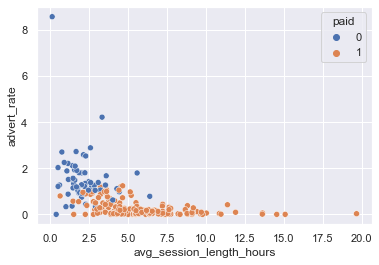

In [261]:
sns.scatterplot(x="avg_session_length_hours", y="advert_rate", hue="paid", data=user_summary_pd);

<AxesSubplot:xlabel='avg_session_length_hours', ylabel='advert_rate'>

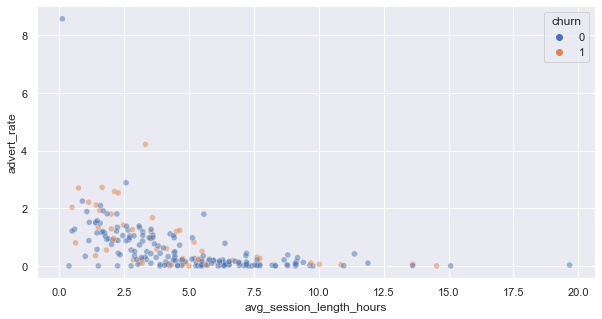

In [268]:
plt.figure(figsize=(10,5));
sns.scatterplot(x="avg_session_length_hours", y="advert_rate", hue="churn", alpha = .5, data=user_summary_pd)

# Feature Engineering
Once you've familiarized yourself with the data, build out the features you find promising to train your model on. To work with the full dataset, you can follow the following steps.
- Write a script to extract the necessary features from the smaller subset of data
- Ensure that your script is scalable, using the best practices discussed in Lesson 3
- Try your script on the full data set, debugging your script if necessary

If you are working in the classroom workspace, you can just extract features based on the small subset of data contained here. Be sure to transfer over this work to the larger dataset when you work on your Spark cluster.

In [25]:
from functools import reduce
from pyspark.sql import DataFrame


def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)
    
    
def train_test_stratified_split(df, feat, weights, seed):
    outcome_vals = df.select(feat).drop_duplicates().toPandas()[feat].tolist()
    
    train_ls = []
    test_ls = [] 
    for outcome in outcome_vals:
        tmp = user_summary.filter(F.col("churn")==outcome).cache()
        train_tmp, test_tmp = tmp.randomSplit(weights, seed = seed)
        train_ls.append(train_tmp)
        test_ls.append(test_tmp)
        
    
    train = unionAll(*train_ls)
    test = unionAll(*test_ls)
    
    return train, test 

In [110]:
train, test = train_test_stratified_split(user_summary, "churn", [.7, .3], 1234)

21/12/07 22:38:09 WARN CacheManager: Asked to cache already cached data.
21/12/07 22:38:10 WARN CacheManager: Asked to cache already cached data.


In [27]:
train.show(5)

+------+------+-----------+------------------+----+-------------+----------------------+-----------------+----------+---------------+------------+-------------------+-----+-----------+--------------+------------------+----------------+---------------+---------------+----------+-------------+-----------+--------------+--------------------------+-------------+-------------+-------------+-------------------+------------------+------------------+------------------+------------------------+------------------------+------------------+---------------------+-------------------+------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+--------------------+--------------------+-------------------------+
|userId|gender|count_items|        sum_length|paid|session_count|submit_downgrade_count|thumbs_down_count|home_count|downgrade_count|ad

In [29]:
train.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|   40|
|    0|  127|
+-----+-----+



In [30]:
test.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|   12|
|    0|   46|
+-----+-----+



Write out training and test sets as parquet. Granted, for this data size it's probably not needed. But for larger data sizes the compression is helpful. 

In [35]:
train.write.parquet("../data/train_data")

In [34]:
test.write.parquet("../data/test_data")

# Modeling
Split the full dataset into train, test, and validation sets. Test out several of the machine learning methods you learned. Evaluate the accuracy of the various models, tuning parameters as necessary. Determine your winning model based on test accuracy and report results on the validation set. Since the churned users are a fairly small subset, I suggest using F1 score as the metric to optimize.

In [54]:
train.limit(5).toPandas()

,userId,gender,count_items,sum_length,paid,session_count,submit_downgrade_count,thumbs_down_count,home_count,downgrade_count,advert_count,save_settings_count,churn,about_count,settings_count,add_playlist_count,add_friend_count,next_song_count,thumbs_up_count,help_count,upgrade_count,error_count,submit_upgrade,non_song_interaction_count,PUT_200_count,GET_200_count,PUT_307_count,tenure_days,thumbs_up_pct,avg_items_session,avg_songs_session,sum_session_length_hours,avg_session_length_hours,interaction_rate,submit_downgrade_rate,thumbs_down_rate,home_rate,downgrade_rate,advert_rate,save_settings_rate,about_rate,settings_rate,add_playlist_rate,add_friend_rate,next_song_rate,thumbs_up_rate,help_rate,upgrade_rate,error_rate,non_song_interaction_rate
0,125,M,11,2089.11310,0,1,0,0,0,0,1,0,1,0,0,0,0,8,0,0,0,0,0,2,8,2,1,0.020532,0.000000,11.000000,8.000000,0.492778,0.492778,22.322435,0.000000,0.000000,0.000000,0.000000,2.029312,0.000000,0.000000,0.000000,0.000000,0.000000,16.234498,0.000000,0.000000,0.000000,0.000000,4.058625
1,51,M,2464,523275.84280,1,10,0,21,75,23,0,1,1,2,12,52,28,2111,100,12,0,1,0,352,2163,125,175,15.779398,0.826446,246.400000,211.100000,145.392778,14.539278,16.947197,0.000000,0.144436,0.515844,0.158192,0.000000,0.006878,0.013756,0.082535,0.357652,0.192582,14.519291,0.687792,0.082535,0.000000,0.006878,2.421028
2,54,F,3437,711344.91954,1,37,1,29,129,39,47,3,1,5,17,72,33,2841,163,17,1,1,1,595,2913,256,267,42.797199,0.848958,92.891892,76.783784,198.745278,5.371494,17.293493,0.005032,0.145915,0.649072,0.196231,0.236484,0.015095,0.025158,0.085537,0.362273,0.166042,14.294679,0.820145,0.085537,0.005032,0.005032,2.993782
3,100014,M,310,67703.47208,1,6,0,3,7,3,2,0,1,0,1,7,6,257,17,2,0,0,0,52,264,16,30,41.244363,0.850000,51.666667,42.833333,18.481389,3.080231,16.773631,0.000000,0.162325,0.378759,0.162325,0.108217,0.000000,0.000000,0.054108,0.378759,0.324651,13.905881,0.919844,0.108217,0.000000,0.000000,2.813641
4,101,M,2149,447464.01467,1,10,0,16,74,22,8,2,1,2,9,61,29,1797,86,12,1,3,1,351,1858,129,159,15.861481,0.843137,214.900000,179.700000,136.263333,13.626333,15.770934,0.000000,0.117420,0.543066,0.161452,0.058710,0.014677,0.014677,0.066049,0.447663,0.212823,13.187700,0.631131,0.088065,0.007339,0.022016,2.575895


In [122]:
from pyspark.ml import Pipeline 
from pyspark.ml.feature import OneHotEncoder, StandardScaler, VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression, GBTClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [70]:
features_to_scale = list(set(user_summary.columns) - set(["userId","gender","churn"]))

In [78]:
features_to_scale

['home_count',
 'avg_items_session',
 'about_count',
 'save_settings_count',
 'home_rate',
 'thumbs_up_count',
 'add_playlist_count',
 'save_settings_rate',
 'count_items',
 'settings_rate',
 'non_song_interaction_count',
 'PUT_307_count',
 'next_song_rate',
 'error_rate',
 'add_friend_count',
 'help_count',
 'error_count',
 'thumbs_up_pct',
 'tenure_days',
 'thumbs_down_count',
 'advert_count',
 'add_friend_rate',
 'interaction_rate',
 'upgrade_count',
 'GET_200_count',
 'advert_rate',
 'avg_songs_session',
 'session_count',
 'downgrade_count',
 'submit_upgrade',
 'thumbs_down_rate',
 'upgrade_rate',
 'sum_session_length_hours',
 'paid',
 'add_playlist_rate',
 'submit_downgrade_rate',
 'PUT_200_count',
 'sum_length',
 'avg_session_length_hours',
 'non_song_interaction_rate',
 'settings_count',
 'downgrade_rate',
 'next_song_count',
 'thumbs_up_rate',
 'help_rate',
 'about_rate',
 'submit_downgrade_count']

### Set-up Logistic Regression Pipeline

In [163]:
si = StringIndexer(inputCol="gender", outputCol="gender_idx")

ohe = OneHotEncoder(inputCol="gender_idx", 
                    outputCol="gender_ohe")

va_sc = VectorAssembler(inputCols=features_to_scale, outputCol="features_to_scale")

sc = StandardScaler(inputCol="features_to_scale", 
                    outputCol="scaled_features", 
                    withMean=True, 
                    withStd=True)

va = VectorAssembler(inputCols=["gender_ohe", "scaled_features"],
                     outputCol="features")

lr = LogisticRegression(featuresCol="features", labelCol="churn", standardization=False)

lr_pipeline = Pipeline(stages=[si, ohe, va_sc, sc, va, lr])

lr_paramGrid = ParamGridBuilder()\
            .addGrid(lr.regParam, [0, 0.1, 0.01])\
            .addGrid(lr.elasticNetParam, [0, 0.5, 1])\
            .build()

In [166]:
lr_crossval = CrossValidator(estimator=lr_pipeline,
                          estimatorParamMaps=lr_paramGrid,
                          evaluator=BinaryClassificationEvaluator(labelCol="churn",
                                                                  metricName="areaUnderPR"),
                          numFolds=2, 
                          seed = 1234)

In [167]:
lr_cv_model = lr_crossval.fit(train)

21/12/11 22:20:40 WARN CacheManager: Asked to cache already cached data.
21/12/11 22:20:40 WARN CacheManager: Asked to cache already cached data.


In [169]:
lr_cv_model.avgMetrics

[0.4600518523060393,
 0.4600518523060393,
 0.4600518523060393,
 0.5082338444162323,
 0.6375295622243417,
 0.5868592116422982,
 0.5439510656695247,
 0.5827779274329756,
 0.5848851984089811]

In [170]:
test_results= lr_cv_model.transform(test)

In [171]:
test_results = test_results.select("churn","prediction").toPandas()

In [172]:
pd.crosstab(test_results["prediction"],test_results["churn"])

churn,0,1
prediction,,
0.0,42,7
1.0,4,5


In [174]:
47/(47+4+7)

0.8103448275862069

In [176]:
test_results = cv_model.transform(test)

In [177]:
test_results = test_results.select("churn","prediction").toPandas()

In [178]:
pd.crosstab(test_results["prediction"],test_results["churn"])

churn,0,1
prediction,,
0.0,42,8
1.0,4,4


### Set-up GBT Classifier Pipeline

In [190]:
gbt = GBTClassifier(featuresCol="features", labelCol="churn", featureSubsetStrategy = 'onethird')

In [191]:
gbt_pipeline = Pipeline(stages=[si, ohe, va_sc, sc, va, gbt])

In [192]:
gbt_paramGrid = ParamGridBuilder()\
                .addGrid(gbt.maxDepth,[5,10])\
                .addGrid(gbt.maxIter, [10,20,40,100])\
                .build()

In [195]:
gbt_crossval = CrossValidator(estimator = gbt_pipeline,
                              estimatorParamMaps=gbt_paramGrid,
                              evaluator=BinaryClassificationEvaluator(labelCol="churn",
                              metricName="areaUnderPR"),
                              numFolds=2, 
                              seed = 1234)

In [ ]:
gbt_cv_model = gbt_crossval.fit(train)

# Final Steps
Clean up your code, adding comments and renaming variables to make the code easier to read and maintain. Refer to the Spark Project Overview page and Data Scientist Capstone Project Rubric to make sure you are including all components of the capstone project and meet all expectations. Remember, this includes thorough documentation in a README file in a Github repository, as well as a web app or blog post.